In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# convert TotalCharges to float

# first remove all the blank Total charges rows
df = df[df.TotalCharges != ' ']
df.shape

(7032, 20)

In [7]:
# convert total charges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

P:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


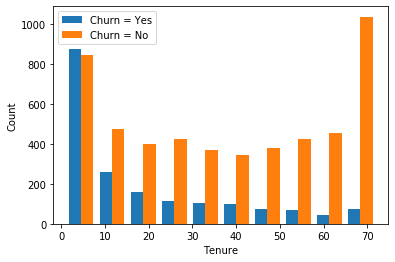

In [9]:
# plot the histogram for the tenure column
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Count')

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

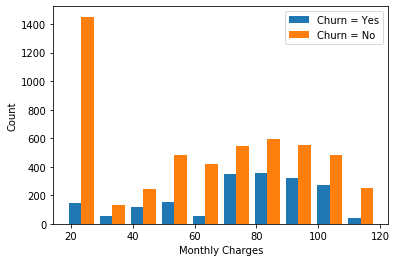

In [10]:
# plot the histogram for the montly charges column
monthly_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Count')

plt.hist([monthly_churn_yes, monthly_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()


In [11]:
def print_unique_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(col, ':', df[col].unique())


In [12]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
# replace 'no internet service' with 'No' in the internet service column
df = df.replace(['No internet service', 'No'], 'No')

In [14]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
df = df.replace(['No phone service', 'No'], 'No')


In [16]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
# convert yes to 1 and no to 0
df = df.replace(['Yes', 'No'], [1, 0])

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [19]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df.iloc[0:5,1:5]

,SeniorCitizen,Partner,Dependents,tenure
0,0,1,0,1
1,0,0,0,34
2,0,0,0,2
3,0,0,0,45
4,0,0,0,2


In [21]:
# print unique values
for col in df.columns:
    print(print(col, ':', df[col].unique()))


gender : [0 1]
None
SeniorCitizen : [0 1]
None
Partner : [1 0]
None
Dependents : [0 1]
None
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
None
PhoneService : [0 1]
None
MultipleLines : [0 1]
None
InternetService : ['DSL' 'Fiber optic' 0]
None
OnlineSecurity : [0 1]
None
OnlineBackup : [1 0]
None
DeviceProtection : [0 1]
None
TechSupport : [0 1]
None
StreamingTV : [0 1]
None
StreamingMovies : [0 1]
None
Contract : ['Month-to-month' 'One year' 'Two year']
None
PaperlessBilling : [1 0]
None
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
None
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
None
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
None
Churn : [0 1]
None


In [22]:
# on hot encoding for internet service, contract, payment method
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3409,0,1,1,0,70,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2078,1,0,1,1,16,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
5289,0,0,0,0,61,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
4788,1,0,0,0,59,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
823,1,0,0,0,5,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [23]:
df.dtypes, df.shape

(gender                                       int64
 SeniorCitizen                                int64
 Partner                                      int64
 Dependents                                   int64
 tenure                                       int64
 PhoneService                                 int64
 MultipleLines                                int64
 OnlineSecurity                               int64
 OnlineBackup                                 int64
 DeviceProtection                             int64
 TechSupport                                  int64
 StreamingTV                                  int64
 StreamingMovies                              int64
 PaperlessBilling                             int64
 MonthlyCharges                             float64
 TotalCharges                               float64
 Churn                                        int64
 InternetService_0                            uint8
 InternetService_DSL                          uint8
 InternetSer

In [24]:
# In Deep Learning, Scaling is the process of normalizing the data to a range of values between 0 and 1.

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6527,1,0,1,1,0.070423,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
6694,1,0,1,1,0.098592,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
5072,1,1,1,0,0.309859,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
3003,1,0,0,1,0.366197,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4026,1,0,1,1,1.000000,1,1,1,1,1,...,0,0,1,0,0,1,0,1,0,0


In [25]:
# print unique values
for col in df.columns:
    print(print(col, ':', df[col].unique()))


gender : [0 1]
None
SeniorCitizen : [0 1]
None
Partner : [1 0]
None
Dependents : [0 1]
None
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
None
PhoneService : [0 1]
None
MultipleLines : [0 1]
None
OnlineSecurity : [0 1]
None
OnlineBack

In [26]:
# save the dataframe to a csv file
df.to_csv('customer_churn_scaled.csv', index=False)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)

In [28]:
model = keras.Sequential()
# first hidden layer
model.add(keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(10, activation='relu')) # second hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.5250 - accuracy: 0.7451
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8004
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8052
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8025
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8052
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4105 - accura

In [29]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7761


[0.47024405002593994, 0.7761194109916687]

In [30]:
y_pred = model.predict(X_test)
y_pred

array([[1.0266304e-02],
       [3.2256573e-02],
       [6.0551715e-01],
       ...,
       [1.2018114e-02],
       [2.2055122e-01],
       [4.5806170e-04]], dtype=float32)

In [31]:
y_test

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1733    0
5250    0
5465    0
5851    0
3984    0
Name: Churn, Length: 1407, dtype: int64

In [32]:
# resphape y_pred to 1D array
y_pred = y_pred.reshape(y_pred.shape[0])

In [33]:
# convert values > 0.5 to 1 and < 0.5 to 0 for y_pred
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



Text(69.0, 0.5, 'Actual')

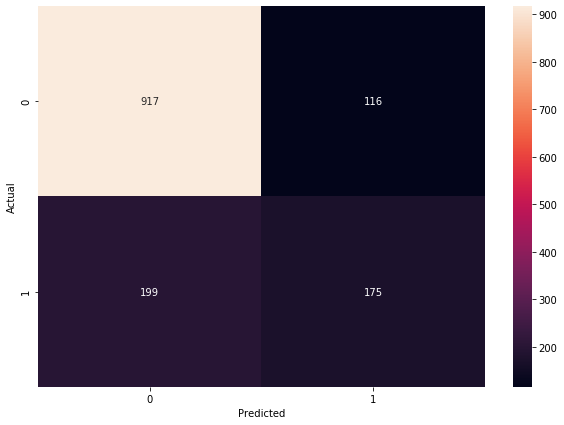

In [35]:
import seaborn as sns

# construct confusion matrix with seaborn heatmap
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
